Dataset : Heart disease dataset

**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

**DATA UNDERSTANDING**

In [2]:
df= pd.read_csv("heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

| **Feature** | **Description** |
|--------------|-----------------|
| **Age** | Age of the patient (in years). |
| **Sex** | Gender of the patient — `1` indicates **male**, `0` indicates **female**. |
| **ChestPainType** | Type of chest pain experienced: <br> `TA` = Typical Angina, `ATA` = Atypical Angina, `NAP` = Non-Anginal Pain, `ASY` = Asymptomatic. |
| **RestingBP** | Resting blood pressure (in mm Hg) — measured when the patient is at rest. |
| **Cholesterol** | Serum cholesterol level (in mg/dl). High values may indicate heart risk. |
| **FastingBS** | Fasting blood sugar — `1` if FastingBS > 120 mg/dl, otherwise `0`. |
| **RestingECG** | Resting electrocardiogram results: <br> `Normal`, `ST` (ST-T wave abnormality), or `LVH` (Left Ventricular Hypertrophy). |
| **MaxHR** | Maximum heart rate achieved during exercise. |
| **ExerciseAngina** | Exercise-induced angina — `Y` = Yes, `N` = No. |
| **Oldpeak** | ST depression induced by exercise relative to rest (measures stress on the heart). |
| **ST_Slope** | Slope of the peak exercise ST segment: <br> `Up` = Upsloping, `Flat` = Flat, `Down` = Downsloping. |
| **HeartDisease** | Target variable — `1` indicates presence of heart disease, `0` indicates absence. |


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.drop_duplicates()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
df.isnull().sum().sum()

0

In [11]:
label_encoder_column = ['Sex', 'ExerciseAngina','RestingECG','ST_Slope','ChestPainType']
label_encoder = LabelEncoder()
for column in label_encoder_column:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


**FINDING OUTLIERS**

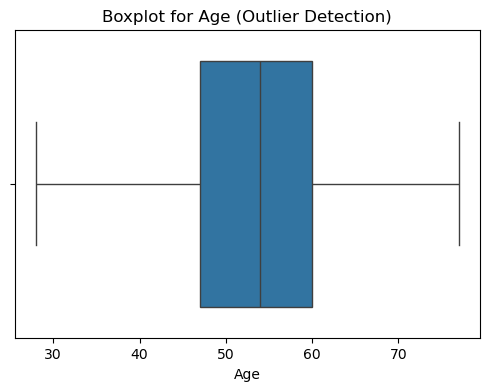

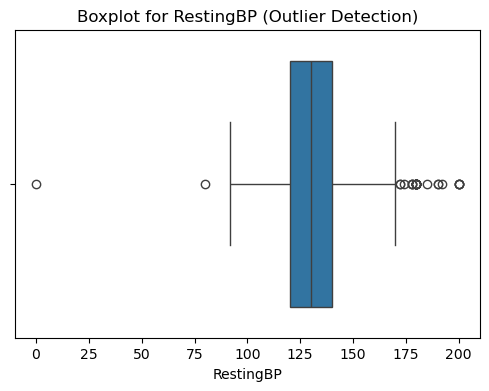

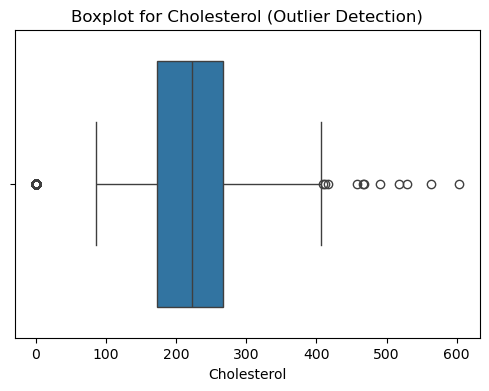

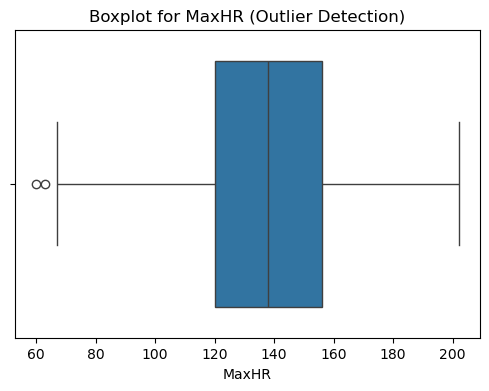

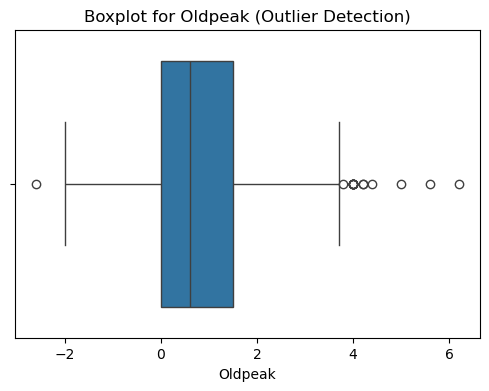

In [12]:
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col} (Outlier Detection)")
    plt.show()

**AFTER FIXING THE OUTLIER**


Column: RestingBP
Lower Bound: 90.0
Upper Bound: 170.0


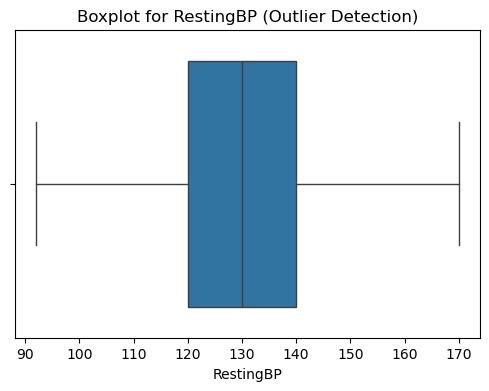


Column: Cholesterol
Lower Bound: 32.625
Upper Bound: 407.625


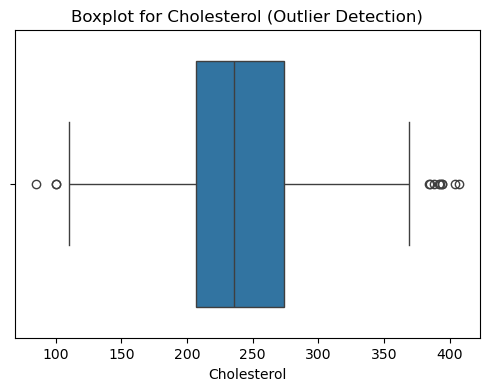


Column: MaxHR
Lower Bound: 66.0
Upper Bound: 210.0


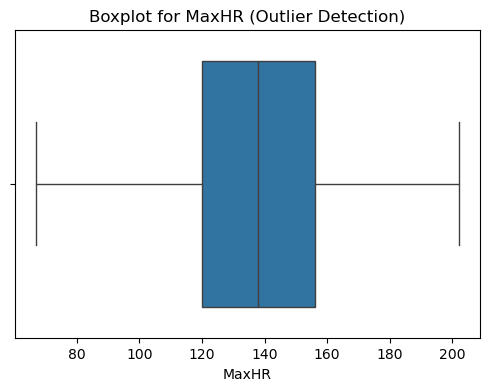


Column: Oldpeak
Lower Bound: -2.25
Upper Bound: 3.75


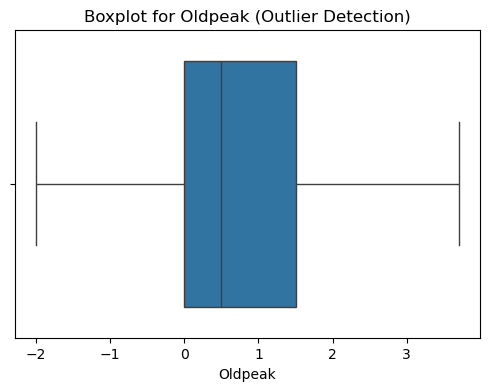

In [19]:
for col in ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = df[df[col].between(lower_bound, upper_bound)]

    print(f"\nColumn: {col}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")

    # Plot boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col} (Outlier Detection)")
    plt.show()

**UNIVARIATE**

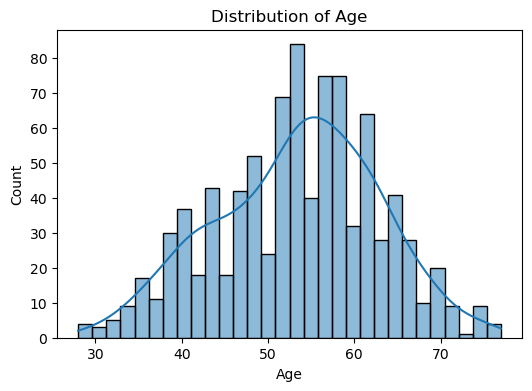

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.show()

**Insights**
- Most heart patients in the dataset are middle-aged, mainly between 45 and 60 years.

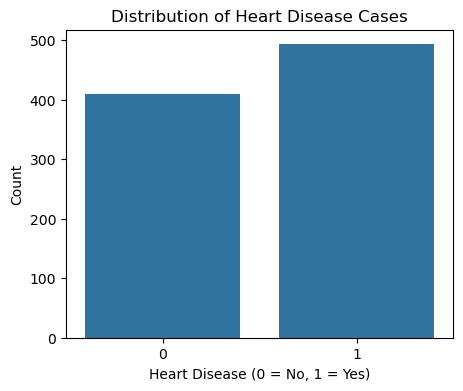

In [15]:
plt.figure(figsize=(5,4))
sns.countplot(x='HeartDisease', data=data)
plt.title('Distribution of Heart Disease Cases')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

**Insights**
-  More individuals are diagnosed with heart disease (1) compared to without heart disease(0).

**BIVARIATE**

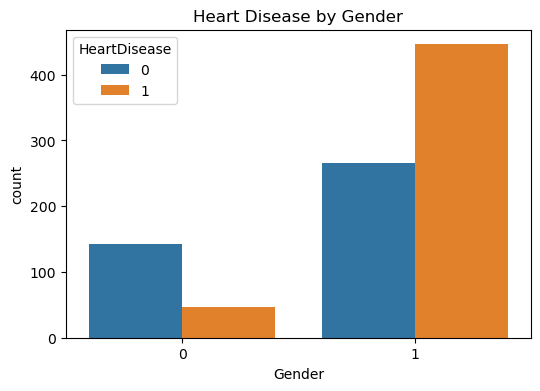

In [53]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='HeartDisease', data=data)
plt.title('Heart Disease by Gender')
plt.xlabel('Gender')
plt.show()

**Insights**
- The chart shows that males have a higher incidence of heart disease compared to females.

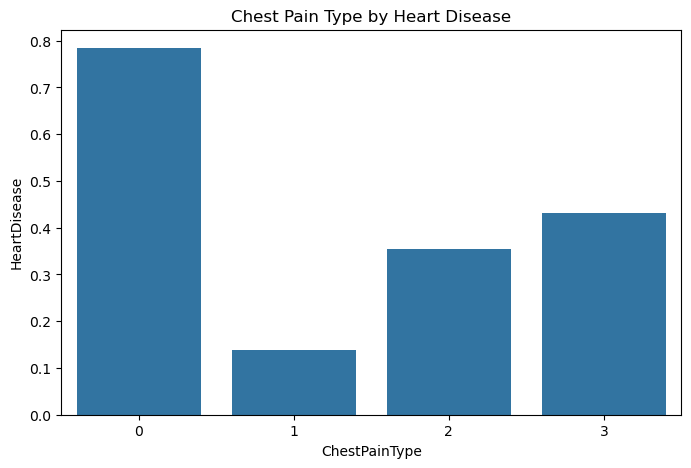

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x='ChestPainType', y='HeartDisease', data=data, ci=None)
plt.title('Chest Pain Type by Heart Disease')
plt.show()

**Insights**
- People with **ASY (asymptomatic)** chest pain type show the highest likelihood of heart disease compared to other chest pain types.
- "ASY": 0, "ATA": 1, "NAP": 2, "TA": 3

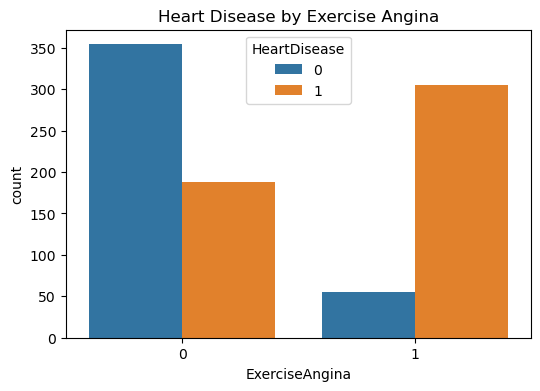

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=data)
plt.title('Heart Disease by Exercise Angina')
plt.show()

**Insights**
- Individuals with Exercise-Induced Angina (Yes) have a higher incidence of heart disease compared to those without angina.

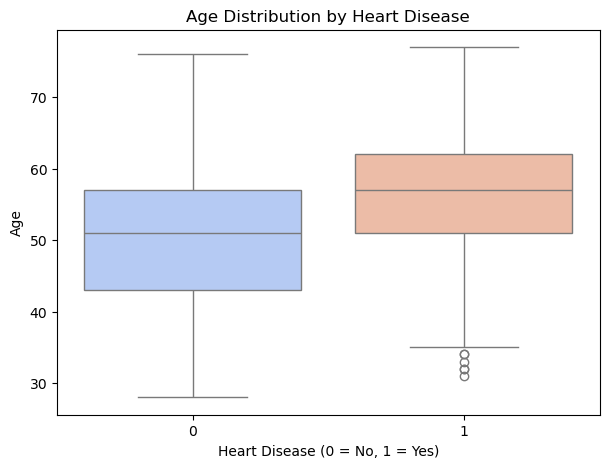

In [19]:
plt.figure(figsize=(7,5))
sns.boxplot(x='HeartDisease', y='Age', data=data, palette='coolwarm')
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


**Insights**
- People with **heart disease (1)** tend to be **older on average** than those without heart disease (0).

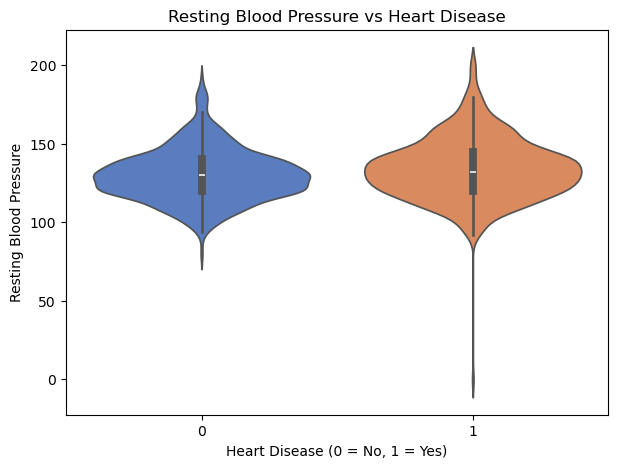

In [20]:
plt.figure(figsize=(7,5))
sns.violinplot(x='HeartDisease', y='RestingBP', data=data, palette='muted')
plt.title('Resting Blood Pressure vs Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Resting Blood Pressure')
plt.show()

**Insights**
- People with heart disease (1) generally have a higher resting blood pressure compared to those without heart disease (0).

**MULTIVARIATE**

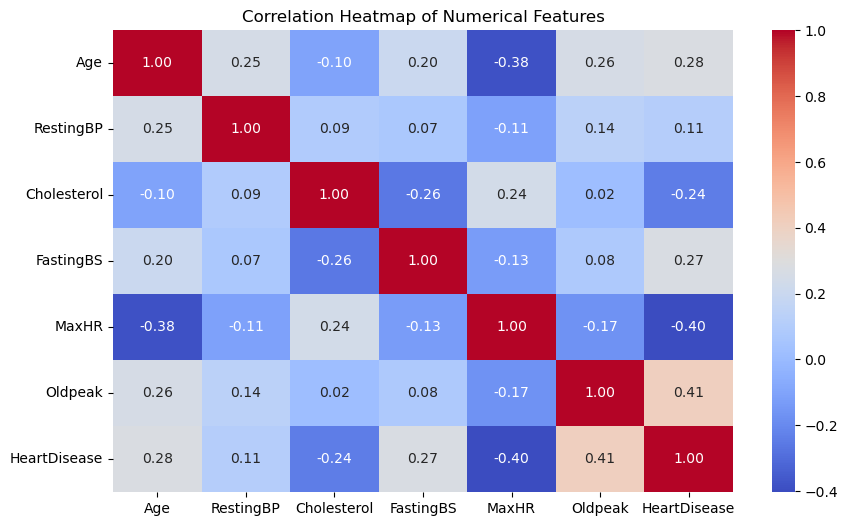

In [21]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])
corr = numeric_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


**Insights**
- HeartDisease shows a positive correlation with Age, Oldpeak, and RestingBP
- MaxHR (maximum heart rate achieved) tends to have a negative correlation with HeartDisease
- Cholesterol and RestingBP might show weaker correlation

**Import Libraries for ML model**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [17]:
print(df.columns.tolist())

['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


**Train the dataset**

In [22]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Standardize Scaler Values**

In [24]:
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [25]:
standardized_data=scaler.transform(X)
print(standardized_data)

[[-1.42535348  0.51657907  0.22201184 ... -0.81498874 -0.86330828
   1.04632456]
 [-0.47112129 -1.93581208  1.27046566 ... -0.81498874  0.17247792
  -0.63300774]
 [-1.74343087  0.51657907  0.22201184 ... -0.81498874 -0.86330828
   1.04632456]
 ...
 [ 0.3770851   0.51657907 -0.82644198 ...  1.22701082  0.37963517
  -0.63300774]
 [ 0.3770851  -1.93581208  0.22201184 ... -0.81498874 -0.86330828
  -0.63300774]
 [-1.63740507  0.51657907  1.27046566 ... -0.81498874 -0.86330828
   1.04632456]]


In [26]:
print(X.shape,X_train.shape,X_test.shape)

(902, 11) (721, 11) (181, 11)


**Logistic Regression**

In [27]:
import warnings
warnings.filterwarnings('ignore')
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_prediction_Logistic=classifier.predict(X_test)
accuracy_logistic=accuracy_score(y_test,y_prediction_Logistic)
confusion_matrix_logistic = confusion_matrix(y_test,y_prediction_Logistic)
classification_report_logistic = classification_report(y_test,y_prediction_Logistic)
print('Accuracy score of the test data: ',accuracy_logistic)
print('confusion Matrix: ',confusion_matrix_logistic)
print(classification_report_logistic)

Accuracy score of the test data:  0.856353591160221
confusion Matrix:  [[67 15]
 [11 88]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        82
           1       0.85      0.89      0.87        99

    accuracy                           0.86       181
   macro avg       0.86      0.85      0.85       181
weighted avg       0.86      0.86      0.86       181



**Support Vector Machine**

In [29]:
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [30]:
y_prediction_svc=svm.predict(X_test)
accuracy_svc=accuracy_score(y_test,y_prediction_svc)
confusion_matrix_svc = confusion_matrix(y_test,y_prediction_svc)
classification_report_svc = classification_report(y_test,y_prediction_svc)
print('Accuracy score of the test data: ',accuracy_svc)
print('confusion Matrix: ',confusion_matrix_svc)
print(classification_report_svc)

Accuracy score of the test data:  0.6961325966850829
confusion Matrix:  [[55 27]
 [28 71]]
              precision    recall  f1-score   support

           0       0.66      0.67      0.67        82
           1       0.72      0.72      0.72        99

    accuracy                           0.70       181
   macro avg       0.69      0.69      0.69       181
weighted avg       0.70      0.70      0.70       181



**KNearest Neighbor**

In [31]:
knn=KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [32]:
y_prediction_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,y_prediction_knn)
confusion_matrix_knn = confusion_matrix(y_test,y_prediction_knn)
classification_report_knn = classification_report(y_test,y_prediction_knn)
print('Accuracy score of the test data: ',accuracy_knn)
print('confusion Matrix: ',confusion_matrix_knn)
print(classification_report_knn)

Accuracy score of the test data:  0.6906077348066298
confusion Matrix:  [[53 29]
 [27 72]]
              precision    recall  f1-score   support

           0       0.66      0.65      0.65        82
           1       0.71      0.73      0.72        99

    accuracy                           0.69       181
   macro avg       0.69      0.69      0.69       181
weighted avg       0.69      0.69      0.69       181



In [33]:
from sklearn.metrics import f1_score
def Elbow(K):
    test_error = []
    for i in K:
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train,y_train)
        tmp = knn.predict(X_test)
        tmp = f1_score(tmp,y_test)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [34]:
k = range(2, 20, 2)

In [35]:
test = Elbow(k)

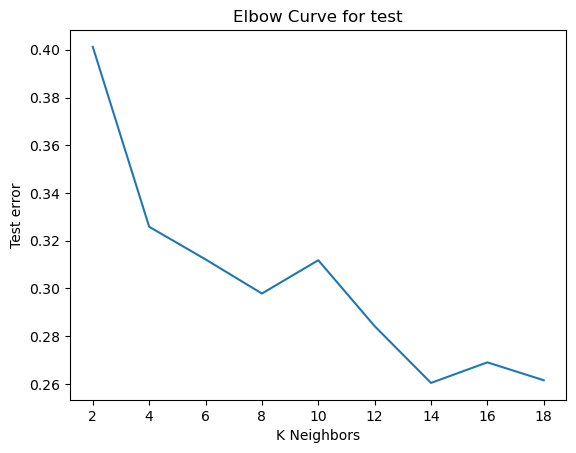

In [36]:
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')
plt.show()

In [37]:
knn = KNeighborsClassifier(n_neighbors = 14) 
knn.fit(X_train, y_train)
y_prediction_knn=knn.predict(X_test)
after_elbow_accuracy=accuracy_score(y_test,y_prediction_knn)
after_confusion_matrix_knn = confusion_matrix(y_test,y_prediction_knn)
after_classification_report_knn = classification_report(y_test,y_prediction_knn)
print('Accuracy score of the testing data: ',after_elbow_accuracy)
print('confusion Matrix: ',after_confusion_matrix_knn)
print(after_classification_report_knn)


Accuracy score of the testing data:  0.7237569060773481
confusion Matrix:  [[60 22]
 [28 71]]
              precision    recall  f1-score   support

           0       0.68      0.73      0.71        82
           1       0.76      0.72      0.74        99

    accuracy                           0.72       181
   macro avg       0.72      0.72      0.72       181
weighted avg       0.73      0.72      0.72       181



In [38]:
print("Before Elbow Method Knn Score: ",accuracy_knn)
print("After Elbow Method to put right K-Value Knn Score: ",after_elbow_accuracy)

Before Elbow Method Knn Score:  0.6906077348066298
After Elbow Method to put right K-Value Knn Score:  0.7237569060773481


**Decision Tree**

In [39]:
dtree=DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
y_prediction_DT=dtree.predict(X_test)
accuracy_dt=accuracy_score(y_test,y_prediction_DT)
confusion_matrix_dt = confusion_matrix(y_test,y_prediction_DT)
classification_report_dt = classification_report(y_test,y_prediction_DT)
print('Accuracy score of the testing data: ',accuracy_dt)
print('confusion Matrix: ',confusion_matrix_dt)
print(classification_report_dt)

Accuracy score of the testing data:  0.8121546961325967
confusion Matrix:  [[64 18]
 [16 83]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        82
           1       0.82      0.84      0.83        99

    accuracy                           0.81       181
   macro avg       0.81      0.81      0.81       181
weighted avg       0.81      0.81      0.81       181



**Random Forest**

In [41]:
rclf=RandomForestClassifier(n_estimators=100, random_state=42)
rclf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [42]:
y_prediction_RF=rclf.predict(X_test)
accuracy_rf=accuracy_score(y_test,y_prediction_RF)
confusion_matrix_rf = confusion_matrix(y_test,y_prediction_RF)
classification_report_rf = classification_report(y_test,y_prediction_RF)
print('Accuracy score of the testing data: ',accuracy_rf)
print('confusion Matrix: ',confusion_matrix_rf)
print(classification_report_rf)

Accuracy score of the testing data:  0.856353591160221
confusion Matrix:  [[69 13]
 [13 86]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        82
           1       0.87      0.87      0.87        99

    accuracy                           0.86       181
   macro avg       0.86      0.86      0.86       181
weighted avg       0.86      0.86      0.86       181



In [43]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(oob_score=True, random_state=42),
                           param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

In [45]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_rf.predict(X_test)
h_rf_accuracy=accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy:", h_rf_accuracy)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Model Accuracy: 0.861878453038674


**Feature Importance**

In [47]:
# Get the feature importances
importances = rclf.feature_importances_
# Create a DataFrame to sort and display feature importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})
# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

           Feature  Importance
10        ST_Slope    0.242523
9          Oldpeak    0.126310
4      Cholesterol    0.112105
7            MaxHR    0.110772
2    ChestPainType    0.107706
8   ExerciseAngina    0.075791
0              Age    0.071702
3        RestingBP    0.064189
1              Sex    0.035548
6       RestingECG    0.029126
5        FastingBS    0.024228


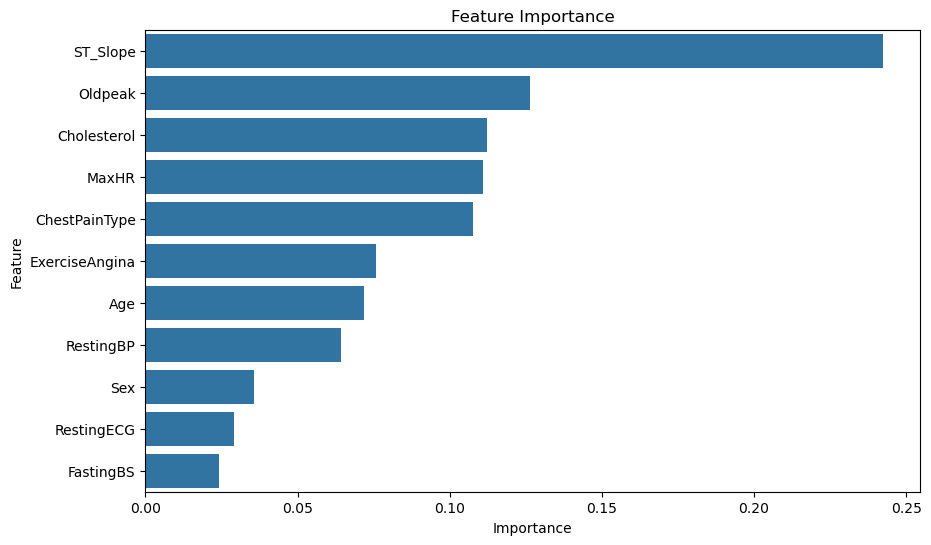

In [48]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

**XGBoosting**

In [46]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [47]:
y_prediction_xgb=xgb_model.predict(X_test)
accuracy_xgb=accuracy_score(y_test,y_prediction_xgb)
confusion_matrix_xgb = confusion_matrix(y_test,y_prediction_xgb)
classification_report_xgb = classification_report(y_test,y_prediction_xgb)
print('Accuracy score of the testing data: ',accuracy_xgb)
print('confusion Matrix: ',confusion_matrix_xgb)
print(classification_report_xgb)

Accuracy score of the testing data:  0.850828729281768
confusion Matrix:  [[70 12]
 [15 84]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        82
           1       0.88      0.85      0.86        99

    accuracy                           0.85       181
   macro avg       0.85      0.85      0.85       181
weighted avg       0.85      0.85      0.85       181



In [48]:
results = {
    "Logistic Regression": accuracy_score(y_test, y_prediction_Logistic),
    "SVM": accuracy_score(y_test, y_prediction_svc),
    "KNN": accuracy_score(y_test, y_prediction_knn),
    "Decision Tree": accuracy_score(y_test, y_prediction_DT),
    "Random Forest": accuracy_score(y_test, y_pred_best),
    "XGBoost":accuracy_score(y_test,y_prediction_xgb)
}

result_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
result_df

,Model,Accuracy
0,Logistic Regression,0.856354
1,SVM,0.696133
2,KNN,0.723757
3,Decision Tree,0.812155
4,Random Forest,0.861878
5,XGBoost,0.850829


**Comparison of accuracy**

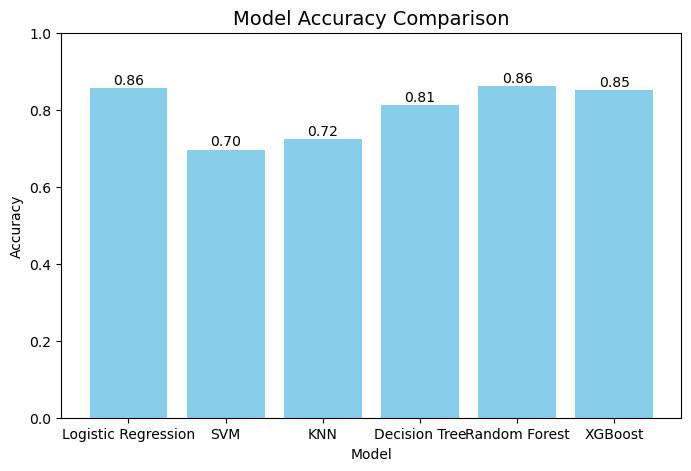

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(result_df['Model'], result_df['Accuracy'], color='skyblue')
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, acc in enumerate(result_df['Accuracy']):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=10)

plt.show()
